# Build a deep learning model that can predict images of numbers.

# I. Introduction

* Deep learning is an artificial intelligence model based on the neural network. It allows learning from complex data such as images, temporal data, etc.

* In deep learning, the neural network contains 3 main parts:
  * **Input layer**: contains the initial data from which the model will learn.
  * **Hidden layer**: the hidden layer(s) which is (are) the transformation of input data via the application of activation functions.
  * **Output layer**: contains the model's predictions.

In [25]:
## Load packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical


# II. Load data

In [26]:
## Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
print(f'Dimensions of training data :  {X_train.shape}')
print(f'Dimensions of test data :  {X_test.shape}')

Dimensions of training data :  (60000, 28, 28)
Dimensions of test data :  (10000, 28, 28)


In [28]:
print(f'Minimum value of training data :  {np.min(X_train)}')
print(f'Maximum value of training data :  {np.max(X_train)}')

Minimum value of training data :  0
Maximum value of training data :  255


In [29]:
## The variable to be predicted y_train contains the predictions of the images of the numbers on X_train
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

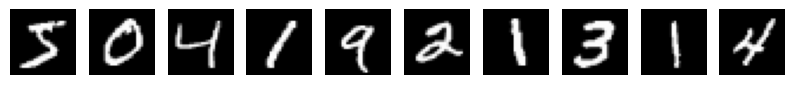

In [30]:
## Display 10 first images of dataset

## Create a figure of size 10 columns x 1 rows
plt.figure(figsize=(10, 3))

## Loop over the first 10 images of X_train
for i in range(10):
    # Adds a subplot in a 1 row by 10 column grid
    plt.subplot(1, 10, i+1)
    ## Displays image i of X_train
    plt.imshow(X_train[i], cmap='gray')
    ## Turns off axes for cleaner visualization
    plt.axis('off')

# Display la figure contenant les 10 images
plt.show()

# III. Data Transformation

### 1. Data Normalization

In [31]:
## Data normalization:
  ## Pixel values ​​in MNIST images range from 0 to 255 (0 for black and, 255 for white)
  ## Data normalization is done by dividing these values ​​by 255 to bring them into the range [0, 1].
  ## This improves numerical stability and accelerates the convergence of the learning model.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [32]:
print(f'Minimum value of training data after normalization :  {np.min(X_train)}')
print(f'Maximum value of training data after normalization :  {np.max(X_train)}')

Minimum value of training data after normalization :  0.0
Maximum value of training data after normalization :  1.0


### 2. Transformation of the variables to be predicted into binary variables (categorical variables)

In [33]:
## When we want to predict a variable that has several modalities like here where we have 10 numbers to predict:
  ## The model will predict the probability that the image is 1 or 2 or 3, etc. and the number with the highest probability will be selected
  ## We will therefore transform the variables to predict (y_train, y_test) into binary variables :
      ## for example, if the image is 5 then y_train will have 1 for this image and 0 for the other images that are not 5.

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
## Convert the variables to be predicted into categorical variables ​​(binary variables).
    ## For example, for column 5, there will be 1 for image 5 and 0 for all other images
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# IV. Deep Learning model

### 1. Build neural network

In [36]:
## Build Neural Network Model

## initialize an instance to build the neural network
model = models.Sequential()


## Add layers :

## Input layer
  ## Flatten the 28x28 images into a 784-element vector :
        ## The dense neural network model requires a 1D input vector, so we need to flatten the 2D images into a 1D vector.
model.add(layers.Flatten(input_shape = (28, 28)))  ## Flattening 28x28 images into a 784-element vector

## First hidden layer = Dense : because we want neurons (128 here) connected at 100% => fully connected
model.add(layers.Dense(128, activation = 'relu'))  ## First dense layer with 128 neurons and ReLU activation

## 2nd hidden layer = Dense : because we want neurons (64 here) connected at 100% => fully connected
model.add(layers.Dense(64, activation = 'relu'))  ## Second dense layer with 64 neurons and ReLU activation

## output layer = Dense because we want neurons (10 here) connected at 100% => fully connected
    ## we have 10 neurons because we have 10 digit images to predict
model.add(layers.Dense(10, activation='softmax'))  ## Output layer with 10 neurons (one for each digit) and softmax activation


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
## Summary of model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### 2. Compile model



In [38]:
## Compile the built model and choose the methodology to optimize the parameters:
  ## in Deep Learning, the methodology used is gradient descent
## the loss function allows to compare the predicted values ​​and the real values
## metrics will allow to evaluate the relevance of the predictions


## Compiling the model
  ## 'adam' is chosen as the optimizer because it is efficient and widely used.
  ## 'categorical_crossentropy' is used as the loss function because we have categorical labels.
  ## metrics = accuracy : because we want precision on predictions
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 3. Train the model

In [39]:
## Model training
  ## The model is trained on the training data (X_train, y_train) and validated on the test data (X_test, y_test).
  ## epochs : is the number of iterations during training
  ## batch_size : instead of taking the entire database as a whole, the algorithm uses batches
                  ## so will split the database into several groups of the same size to optimize the parameters
  ## validation_split : remove a part of X_train to validate the performance at each epoch

model_training = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8604 - loss: 0.4757 - val_accuracy: 0.9622 - val_loss: 0.1348
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9654 - loss: 0.1158 - val_accuracy: 0.9626 - val_loss: 0.1169
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9777 - loss: 0.0742 - val_accuracy: 0.9697 - val_loss: 0.1051
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9840 - loss: 0.0519 - val_accuracy: 0.9729 - val_loss: 0.0932
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9875 - loss: 0.0405 - val_accuracy: 0.9738 - val_loss: 0.0896
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9884 - loss: 0.0335 - val_accuracy: 0.9709 - val_loss: 0.1156
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9906 - loss: 0.0274 - val_accuracy: 0.9721 - val_loss: 0.1099
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9926 - loss: 0.0219

### 4. Evaluate the performance of the model

In [40]:
## Model Evaluation
    ## Evaluation of the model performance is done on the test data.
    ## Calculate the loss function and accuracy on the test data.

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nLoss Function: {test_loss}')
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.9751 - loss: 0.1461

Loss Function: 0.14606885612010956

Test accuracy: 0.9750999808311462


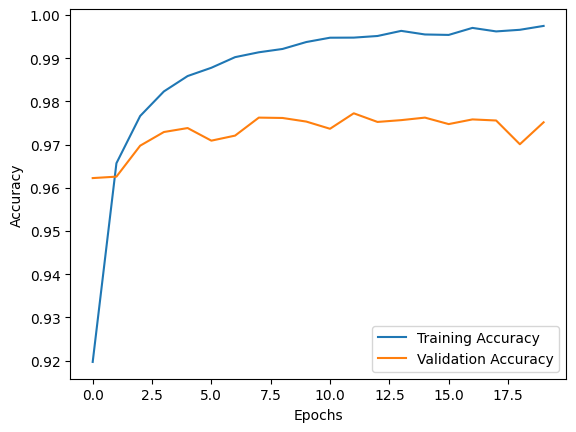

In [41]:
## If we train the model several times, there is a risk of overfitting :
        ## visualize the accuracy and loss function of the model on the training data and the validation data

## Visualization of training performance: accuracy
plt.plot(model_training.history['accuracy'], label='Training Accuracy')
plt.plot(model_training.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We note a fluctuation in the validation test after epochs = 5 so we will stop at epochs = 3 to train the models to avoid overfitting.


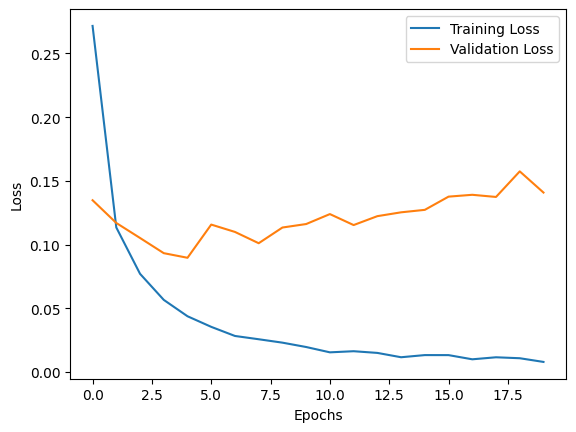

In [45]:
## Visualization of training performance: loss function
plt.plot(model_training.history['loss'], label='Training Loss')
plt.plot(model_training.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 5. Data Prediction

In [43]:
## Predict the number that is on the image in the test data

predictions = model.predict(X_test[:10]) ## predict the first 10 images


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


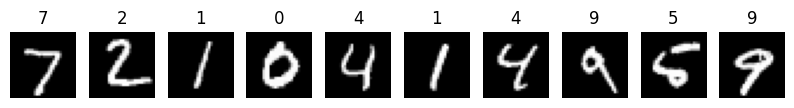

In [44]:
## Visualize predicted images versus actual (starting) images
    ## Display predictions for the first 10 images of the test dataset
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.show()

We get 100% prediction for the first 10 images